In [5]:
:ext TupleSections
:ext OverloadedStrings

In [6]:
import Graphics.Vega.VegaLite hiding (filter, lookup, repeat)
import qualified Graphics.Vega.VegaLite as VL (filter, lookup, repeat)

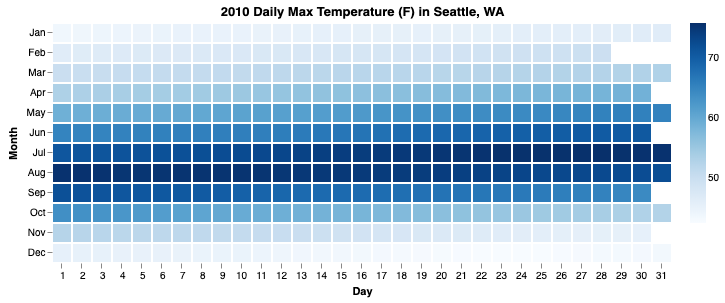

In [3]:
rectHeatmapWeather =
    let dvals = dataFromUrl "./seattle-temps.csv" []
        label = title "2010 Daily Max Temperature (F) in Seattle, WA" []
        
        conf = configure
                 . configuration (View [ViewStrokeWidth 0])
                 . configuration (Scale [SCRangeStep (Just 20)])
                 . configuration (Axis [Domain False])
    
        enc = encoding
                 . position X [ PName "date", PTimeUnit Date, PmType Ordinal
                              , PTitle "Day", PAxis [AxLabelAngle 0, AxFormat "%e"] ]
                 . position Y [ PName "date", PTimeUnit Month, PmType Ordinal
                              , PTitle "Month" ]
                 . color [ MName "temp", MAggregate Max, MmType Quantitative
                         , MLegend [LNoTitle], MScale [SScheme "blues" []]]
                         
    in toVegaLite [dvals, label, conf [], mark Rect [], enc []]
    
vlShow rectHeatmapWeather

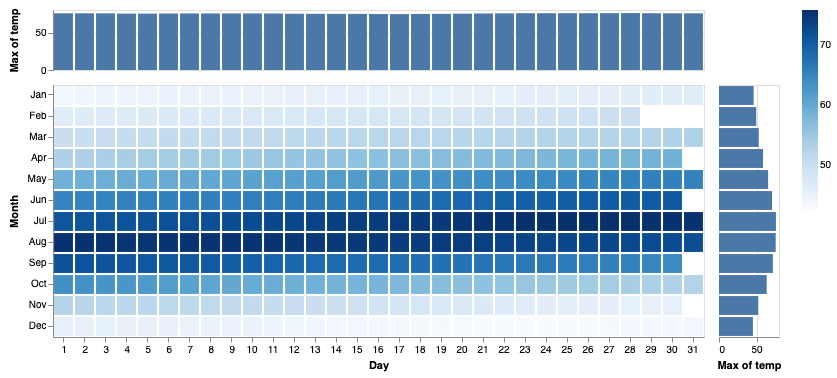

In [4]:
margHeatmapWeather =
    let dvals = dataFromUrl "./seattle-temps.csv" []
        label = title "2010 Daily Max Temperature (F) in Seattle, WA" []
        
        conf = configure
                 . configuration (View [ViewStrokeWidth 0])
                 . configuration (Scale [SCRangeStep (Just 20)])
                 . configuration (Axis [Domain False])
    
        heat = [ mark Rect []
               , conf []
               , encoding
                   . position X [ PName "date", PTimeUnit Date, PmType Ordinal
                                , PTitle "Day", PAxis [AxLabelAngle 0, AxFormat "%e"] ]
                   . position Y [ PName "date", PTimeUnit Month, PmType Ordinal
                                , PTitle "Month" ]
                   . color [ MName "temp", MAggregate Max, MmType Quantitative
                           , MLegend [LNoTitle], MScale [SScheme "blues" []]]
                   $ []
               ]
        
        abar = [ mark Bar []
               , height 60
               , encoding
                   . position X [PName "date", PTimeUnit Date, PmType Ordinal, PAxis []]
                   . position Y [PName "temp", PAggregate Max, PmType Quantitative]
                   $ []
               ]
               
        bbar = [ mark Bar []
               , width 60
               , encoding
                   . position Y [PName "date", PTimeUnit Month, PmType Ordinal, PAxis []]
                   . position X [PName "temp", PAggregate Max, PmType Quantitative]
                   $ []
               ]
            
        hPlots = map asSpec [heat, bbar]
        
        plots = map asSpec [abar, [spacing 15, bounds Flush, hConcat hPlots]]
                         
    in toVegaLite [dvals, spacing 15, bounds Flush, vConcat plots]
    
vlShow margHeatmapWeather